In [1]:
import numpy as np
import math
from pathlib import Path
from os import listdir
from os.path import isfile, join
import pandas as pd

These csv are from our trainning data and are not trimmed down to the still moments

In [2]:
warrior_one = pd.read_csv("warrior2_arms_1.csv")

In [78]:
warrior_one.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
warrior_one.iloc[500:510, :]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
500,500,682.217,151.393,0.922500,635.228,214.069,0.888354,572.597,214.093,0.776603,...,0.764274,378.627,648.924,0.808352,366.840,637.251,0.770601,386.432,613.705,0.568596
501,501,682.212,151.383,0.920898,635.219,214.089,0.885061,572.569,214.114,0.770898,...,0.759609,380.506,648.924,0.811570,366.856,637.252,0.777057,386.431,615.618,0.584354
502,502,682.214,151.401,0.919530,635.196,214.098,0.882720,572.534,215.979,0.765744,...,0.758481,380.505,648.933,0.801733,366.857,637.260,0.769805,386.438,615.625,0.578143
503,503,682.212,151.400,0.922227,635.196,214.113,0.878550,572.522,216.005,0.764894,...,0.755465,378.625,648.923,0.800491,366.843,637.255,0.770161,386.442,615.647,0.577353
504,504,682.191,151.363,0.928649,635.199,214.112,0.878277,572.534,216.006,0.764653,...,0.758039,378.617,648.915,0.792465,366.843,637.243,0.768547,386.442,613.739,0.575920
505,505,682.196,151.361,0.924829,635.189,215.970,0.874707,572.523,216.006,0.767143,...,0.754163,378.624,648.897,0.797237,366.846,637.224,0.777326,386.462,615.646,0.585729
506,506,682.196,151.361,0.926905,635.194,215.975,0.874670,572.531,216.022,0.765748,...,0.757988,378.625,648.897,0.794267,366.842,637.223,0.772808,386.451,613.736,0.585963
507,507,682.194,151.333,0.933524,635.209,215.984,0.874376,572.543,216.029,0.765420,...,0.756248,378.608,648.903,0.802574,366.834,637.228,0.780890,386.449,613.704,0.573594
508,508,682.194,151.329,0.938650,635.199,215.973,0.876259,572.525,216.035,0.761533,...,0.753678,378.617,648.919,0.806304,366.841,637.246,0.778958,386.435,613.724,0.583925
509,509,682.205,151.340,0.937807,635.190,215.975,0.877862,572.530,216.023,0.765579,...,0.751214,378.600,648.894,0.797834,366.828,637.217,0.782583,386.439,613.726,0.585712


In [6]:
diff_warrior_one = warrior_one.diff()

In [10]:
diff_warrior_one.iloc[500:510, :]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
500,1.0,-0.003,-0.020,0.007405,0.003,-0.015,0.004870,0.018,-0.007,0.000119,...,0.008354,0.003,0.005,-0.002167,0.000,0.000,-0.004708,0.001,-0.003,-0.001807
501,1.0,-0.005,-0.010,-0.001602,-0.009,0.020,-0.003293,-0.028,0.021,-0.005705,...,-0.004665,1.879,0.000,0.003218,0.016,0.001,0.006456,-0.001,1.913,0.015758
502,1.0,0.002,0.018,-0.001368,-0.023,0.009,-0.002341,-0.035,1.865,-0.005154,...,-0.001128,-0.001,0.009,-0.009837,0.001,0.008,-0.007252,0.007,0.007,-0.006211
503,1.0,-0.002,-0.001,0.002697,0.000,0.015,-0.004170,-0.012,0.026,-0.000850,...,-0.003016,-1.880,-0.010,-0.001242,-0.014,-0.005,0.000356,0.004,0.022,-0.000790
504,1.0,-0.021,-0.037,0.006422,0.003,-0.001,-0.000273,0.012,0.001,-0.000241,...,0.002574,-0.008,-0.008,-0.008026,0.000,-0.012,-0.001614,0.000,-1.908,-0.001433
505,1.0,0.005,-0.002,-0.003820,-0.010,1.858,-0.003570,-0.011,0.000,0.002490,...,-0.003876,0.007,-0.018,0.004772,0.003,-0.019,0.008779,0.020,1.907,0.009809
506,1.0,0.000,0.000,0.002076,0.005,0.005,-0.000037,0.008,0.016,-0.001395,...,0.003825,0.001,0.000,-0.002970,-0.004,-0.001,-0.004518,-0.011,-1.910,0.000234
507,1.0,-0.002,-0.028,0.006619,0.015,0.009,-0.000294,0.012,0.007,-0.000328,...,-0.001740,-0.017,0.006,0.008307,-0.008,0.005,0.008082,-0.002,-0.032,-0.012369
508,1.0,0.000,-0.004,0.005126,-0.010,-0.011,0.001883,-0.018,0.006,-0.003887,...,-0.002570,0.009,0.016,0.003730,0.007,0.018,-0.001932,-0.014,0.020,0.010331
509,1.0,0.011,0.011,-0.000843,-0.009,0.002,0.001603,0.005,-0.012,0.004046,...,-0.002464,-0.017,-0.025,-0.008470,-0.013,-0.029,0.003625,0.004,0.002,0.001787


In [14]:
diff_warrior_one.shape 

(710, 76)

In [15]:
rows_total_diff = diff_warrior_one.sum(axis=1)

In [16]:
rows_total_diff[500:510]

500     1.025307
501     8.406279
502     1.059449
503    14.268254
504    -2.786916
505     8.856067
506    -6.563395
507     6.850009
508     4.793018
509    -0.931275
dtype: float64

In [17]:
sum(rows_total_diff[500:510])

34.976796999999934

In [22]:
# want to find where there is the smallest change
rows_total_diff = [abs(i) for i in rows_total_diff]
ten_rows_diff = []

for i in range(len(rows_total_diff)-10):
    ten_rows_diff.append((i, sum(rows_total_diff[i:(i+10)])))

best_ten = sorted(ten_rows_diff, key=lambda x: x[1], reverse=False)
print(best_ten[0])

(554, 22.008198999998505)


In [23]:
still_point = best_ten[0][0]

stillest_ten = warrior_one.iloc[still_point:still_point+10, :]
stillest_ten

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
554,554,682.385,151.327,0.894293,635.268,214.122,0.871389,572.622,215.976,0.763108,...,0.757559,378.620,648.922,0.801648,366.845,637.250,0.770646,386.437,613.715,0.572982
555,555,682.378,151.349,0.894197,635.270,214.099,0.874792,572.643,214.088,0.767027,...,0.763381,378.628,648.931,0.801938,366.848,637.257,0.767880,386.433,613.692,0.575072
556,556,682.378,151.347,0.900988,635.271,214.078,0.879919,572.636,214.069,0.774731,...,0.756631,378.622,648.919,0.800899,366.847,637.244,0.771458,386.436,613.686,0.574704
557,557,684.202,151.341,0.896742,635.290,214.095,0.872703,572.654,214.077,0.765815,...,0.758198,378.604,648.926,0.802897,366.840,637.252,0.771424,386.438,611.767,0.568569
558,558,682.394,151.363,0.897011,635.290,214.095,0.872868,574.501,214.061,0.766377,...,0.761273,378.607,648.933,0.799808,366.839,637.258,0.768552,386.454,611.737,0.563172
559,559,684.221,151.382,0.889059,635.281,214.119,0.870310,572.628,214.097,0.765108,...,0.751771,378.617,648.918,0.803539,366.842,637.245,0.775767,386.451,611.772,0.567331
560,560,684.231,151.411,0.881316,635.265,214.112,0.873154,572.620,214.093,0.769515,...,0.751793,378.606,648.918,0.804090,366.833,637.245,0.772189,386.444,611.780,0.560988
561,561,684.226,151.397,0.884706,635.276,215.972,0.868382,572.639,214.112,0.765840,...,0.749790,378.588,648.918,0.807992,366.824,637.245,0.777020,386.444,613.700,0.564617
562,562,684.228,151.398,0.886481,635.281,214.113,0.870421,574.489,214.091,0.764184,...,0.751219,378.597,648.922,0.807966,366.828,637.252,0.777077,386.442,613.691,0.565060
563,563,684.239,151.413,0.882333,635.286,214.101,0.872766,572.647,214.081,0.768265,...,0.750156,378.597,648.905,0.803136,366.825,637.228,0.779926,386.445,613.695,0.572292


In [24]:
def ten_still_frames(pose_csv):
    pose_df = pd.read_csv(pose_csv)
    pose_diff = pose_df.diff()
    rows_total_diff = pose_diff.sum(axis=1)
    rows_total_diff = [abs(i) for i in rows_total_diff]
    ten_rows_diff = []
    for i in range(len(rows_total_diff)-10):
        ten_rows_diff.append((i, sum(rows_total_diff[i:(i+10)])))
    best_ten = sorted(ten_rows_diff, key=lambda x: x[1], reverse=False)
    still_point = best_ten[0][0]
    stillest_ten = pose_df.iloc[still_point:still_point+10, :]
    return stillest_ten

In [27]:
hips_ten = ten_still_frames("warrior2_hips_1.csv")
hips_ten

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
406,409,790.057,133.634,0.913209,729.346,182.741,0.854039,676.366,169.023,0.726843,...,0.767888,527.479,650.901,0.722404,519.693,645.041,0.624147,541.271,625.492,0.579410
407,410,790.055,133.644,0.913300,729.316,182.735,0.857443,676.380,169.015,0.726650,...,0.769911,525.516,650.852,0.669427,521.605,645.046,0.559663,541.280,623.543,0.518505
408,411,790.036,133.638,0.915589,729.348,182.741,0.851615,676.371,169.034,0.723288,...,0.773203,525.560,649.022,0.693049,521.606,643.099,0.593717,543.154,625.441,0.545666
409,412,790.029,131.823,0.916391,729.300,182.730,0.861554,676.355,169.008,0.726015,...,0.773471,525.567,650.852,0.699971,521.649,645.026,0.587822,543.148,623.509,0.540758
410,413,790.047,133.638,0.912418,729.335,182.723,0.859713,676.356,168.999,0.725315,...,0.773584,525.596,649.053,0.719531,521.635,643.122,0.610387,541.281,623.521,0.550821
411,414,790.037,133.635,0.907991,729.331,182.712,0.859483,676.359,168.970,0.728389,...,0.768247,525.587,650.852,0.721689,521.610,645.014,0.616630,541.281,623.543,0.553175
412,415,790.028,131.816,0.911048,729.315,182.706,0.860203,676.359,168.977,0.728884,...,0.769750,525.615,650.854,0.732825,521.608,643.105,0.620034,541.261,625.447,0.569485
413,416,790.027,131.772,0.912183,729.308,182.676,0.863459,674.460,167.066,0.739061,...,0.762094,523.636,650.883,0.550218,523.585,646.995,0.455357,541.275,621.554,0.467904
414,417,790.031,131.763,0.914972,729.317,182.669,0.864089,676.361,167.069,0.737237,...,0.772446,523.610,649.038,0.364929,521.603,645.053,0.302407,541.275,623.486,0.353569
415,418,790.018,131.821,0.912368,729.302,180.849,0.868483,674.451,167.057,0.737988,...,0.764502,525.540,649.030,0.686132,521.596,643.119,0.576642,541.275,625.493,0.536601


In [83]:
torso_ten = ten_still_frames("warrior2_torso_1.csv")
torso_ten

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,65,66,67,68,69,70,71,72,73,74
724,725,835.024,151.318,0.884872,758.752,200.304,0.846473,697.992,182.691,0.740910,...,0.757310,429.539,625.462,0.724910,417.833,617.637,0.727050,449.152,598.021,0.583556
725,726,835.014,149.503,0.885601,758.763,200.300,0.849473,697.994,182.690,0.745653,...,0.762679,429.566,625.461,0.730671,419.718,617.640,0.728601,449.157,596.108,0.584919
726,727,835.024,149.474,0.895244,758.736,200.301,0.851087,697.964,182.709,0.745682,...,0.758218,429.587,625.450,0.723976,419.736,617.633,0.721787,449.196,596.059,0.571361
727,728,835.009,149.449,0.900652,758.720,198.436,0.850685,698.004,182.704,0.739910,...,0.744769,429.572,623.562,0.724776,419.723,617.616,0.721617,451.082,596.063,0.573850
728,729,833.144,149.441,0.896294,758.734,198.446,0.848930,697.972,182.700,0.743611,...,0.749075,429.589,623.553,0.733471,419.739,617.617,0.731650,449.188,598.023,0.588246
729,730,833.142,149.471,0.887273,758.736,200.297,0.850501,697.982,182.691,0.743391,...,0.753042,429.607,623.537,0.731044,419.748,617.606,0.729928,449.187,596.081,0.579347
730,731,835.005,149.443,0.896554,758.747,198.433,0.855168,697.991,182.672,0.746631,...,0.757625,431.458,623.531,0.744989,419.777,617.609,0.735700,449.184,596.081,0.574076
731,732,833.145,149.430,0.894400,758.729,198.422,0.856484,697.941,180.846,0.753553,...,0.764462,431.460,623.512,0.750989,419.791,617.597,0.737513,449.200,598.008,0.587485
732,733,833.127,149.446,0.888212,758.744,198.427,0.856019,697.937,182.666,0.752612,...,0.758237,429.615,623.519,0.742327,419.762,617.594,0.734265,451.087,598.014,0.584053
733,734,833.112,149.477,0.878689,758.733,198.428,0.857020,697.924,182.669,0.753144,...,0.756933,429.610,623.519,0.741969,419.763,617.595,0.729022,451.095,596.091,0.577394


In [120]:
def ten_still_frames(pose_csv):
    pose_df = pd.read_csv(pose_csv)
    pose_diff = pose_df.diff()
    rows_total_diff = pose_diff.sum(axis=1)
    rows_total_diff = [abs(i) for i in rows_total_diff]
    ten_rows_diff = []
    for i in range(len(rows_total_diff)-10):
        ten_rows_diff.append((i, sum(rows_total_diff[i:(i+10)])))
    best_ten = sorted(ten_rows_diff, key=lambda x: x[1], reverse=False)
    still_point = best_ten[0][0]
    stillest_ten = pose_df.iloc[still_point:still_point+10, :]
    return stillest_ten

def x_y_points(data):
    """
    from array of average of points in a single 'pose_keypoints_2d' array 
    finds x and y corridnates and return two lists
    """
    x_warrior = []
    y_warrior = []
    c_warrior = [] # certainity of pose
    for n in range(len(data)):
        if (n%3) == 0:
            x_warrior.append(data[n])
        elif (n%3) == 1:
            y_warrior.append(data[n])
        elif (n%3) == 2:
            c_warrior.append(data[n])

    return x_warrior, y_warrior


def straight_arms(x, y, max_slope=0.2):
    """
    input array of 25 x corridnates and array of 25 y corridinates from openpose (x_y_points(data))
    output is slope of the line from one hand to another
    perfectly straight arms would have a slope of zero.
    7:"LWrist" and 4:"RWrist"
    0 - straight
    1 - not straight
    returns slope and label
    """
    slope = (y[4] - y[7])/(x[4]-x[7])
    if -max_slope <= slope <= max_slope:
        return slope, 0
    else:
        return slope, 1


def straight_torso(x, y, min_slope=9):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    0 - straight
    1 - not straight
    returns slope and label
    """
    slope = (y[1] - y[8])/(x[1]-x[8])
    if abs(slope) >= min_slope:
        return slope, 0
    else:
        return slope, 1


def torso_forward(x, y, min_slope=0.3):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    for too far forward we see if the slope if larger than the min slope
    0 - not too far forward
    1 - too far forward
    returns slope and label
    """
    rev_slope = (x[1]-x[8])/(y[1] - y[8])
    if rev_slope >= min_slope:
        return rev_slope, 1
    else:
        return rev_slope, 0


def torso_backward(x, y, min_slope=-0.3):
    """
    1:"Neck" and 8:"MidHip"
    perfect would be a vertial line, so steep/high slope is ideal
    swtiches x and y for easier computation, want reversed slope to be zero if straight
    for too far forward we see if the slope if larger than the min slope
    0 - not too far forward
    1 - too far forward
    returns slope and label
    """
    rev_slope = (x[1]-x[8])/(y[1] - y[8])
    if rev_slope <= min_slope:
        return rev_slope, 1
    else:
        return rev_slope, 0


def hips_square(x, y, max_slope=0.2):
    """
    9:"RHip" and 12:"LHip"
    straight line (square hips) would have a slope of 0
    0 - stright
    1 - not straight
    """
    slope = (y[9] - y[12])/(x[9]-x[12])
    if -max_slope <= slope <= max_slope:
        return slope, 0
    else:
        return slope, 1


def shoulders_up(x, y, max_slope=0.2):
    """
    1:"Neck",
    2:"RShoulder",
    5:"LShoulder".
    looks at line from left shoulder to neck, and line from right shoulder to neck
    if either are not straight returns 1
    if both are flat (slope of 0 or close to 0) returns 1
    """
    left_slope = (y[1] - y[5])/(x[1]-x[5])
    right_slope = (y[1] - y[2])/(x[1]-x[2])
    if abs(left_slope) >= max_slope or abs(right_slope) >= max_slope:
        return left_slope, right_slope, 1
    else:
        return left_slope, right_slope, 0


def head_front(x, y, max_ratio_diff=0.2):
    """
    0:"Nose"
    15:"REye"
    16:"LEye"
    17:"REar"
    18:"LEar"
    Compares distance from left eye to right eye
    If looking forward eye to eye distance will be larger and closer to ear to ear distance
    If looking if head is front they will be small, and much smaller than ear to ear distance
    Divide by length from ear to ear to normalize and account for different distance
    label 0 - head is front
    label 1 - head is not facing the front (facing the side)
    """
    ear_dist = np.sqrt((x[17]-x[18])**2+(y[17]-y[18])**2)
    eye_dist = np.sqrt((x[15]-x[16])**2+(y[15]-y[16])**2)
    ratio = eye_dist/ear_dist
    if ratio > max_ratio_diff:
        return ratio, 1
    else:
        return ratio, 0


def front_knee_obtuse(x, y, max_angle=95, side='right'):
    """
    10:"RKnee",
    11:"RAnkle",
    13:"LKnee",
    14:"LAnkle"
    """
    if side =='right':
        degrees = math.degrees(math.atan2(y[11]-y[10], x[11]-x[10]))
    else:
        degrees = math.degrees(math.atan2(y[14]-y[13], x[14]-x[13]))
    if degrees > max_angle:
        return degrees, 1
    else:
        return degrees, 0


def front_knee_acute(x, y, min_angle=85, side='right'):
    """
    10:"RKnee",
    11:"RAnkle",
    13:"LKnee",
    14:"LAnkle"
    """
    if side =='right':
        degrees = math.degrees(math.atan2(y[11]-y[10], x[11]-x[10]))
    else:
        degrees = math.degrees(math.atan2(y[14]-y[13], x[14]-x[13]))
    if degrees < min_angle:
        return degrees, 1
    else:
        return degrees, 0


def step_wider(x, y, min_ratio=0.5):
    """
    4:"RWrist",
    7:"LWrist",
    11:"RAnkle",
    14:"LAnkle".
    compares arm span to distance between feet
    if feet are wide enough, the distance between feet will be similar
    to the distance between arms
    label - 0 feet are wide enough
    label - 1 feet are too narrow
    """
    arm_distance = np.sqrt((x[7]-x[4])**2+(y[7]-y[4])**2)
    feet_disatance = np.sqrt((x[11]-x[14])**2+(y[11]-y[14])**2)
    ratio = feet_disatance/arm_distance
    if ratio < min_ratio:
        return ratio, 1
    else:
        return ratio, 0

POSE_BODY_25_BODY_PARTS  = {
    0:"Nose",
    1:"Neck",
    2:"RShoulder",
    3:"RElbow",
    4:"RWrist",
    5:"LShoulder",
    6:"LElbow",
    7:"LWrist",
    8:"MidHip",
    9:"RHip",
    10:"RKnee",
    11:"RAnkle",
    12:"LHip",
    13:"LKnee",
    14:"LAnkle",
    15:"REye",
    16:"LEye",
    17:"REar",
    18:"LEar",
    19:"LBigToe",
    20:"LSmallToe",
    21:"LHeel",
    22:"RBigToe",
    23:"RSmallToe",
    24:"RHeel",
    25:"Background"}

def warroir2_label_csv(pose_csv, side='right'):
    """
    takes averages of all rows (2d_points)
    order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider
    1 - needs to be adjusted
    0 - good
    """
    warrior_df = ten_still_frames(pose_csv)
    warrior = np.array(warrior_df)
    warrior_means = np.mean(warrior, axis=0)  # average for each point accros all ten frames
    x, y = x_y_points(warrior_means[1:])
    labels = []
    values = []
    ratio, label = head_front(x, y)
    labels.append(label)
    values.append(ratio)
    left_slope, right_slope, label = shoulders_up(x, y)
    labels.append(label)
    values.append((left_slope, right_slope))
    slope, label = straight_arms(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_forward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_backward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = hips_square(x, y)
    labels.append(label)
    values.append(slope)
    if side == 'right':
        acute_angle, acute_label = front_knee_acute(x, y, side='right')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='right')
    else:
        acute_angle, acute_label = front_knee_acute(x, y, side='left')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='left')
    labels.append(acute_label)
    values.append(acute_angle)
    labels.append(obtuse_label)
    values.append(obtuse_angle)
    distance, label = step_wider(x, y)
    labels.append(label)
    values.append(distance)
    return labels, values

In [121]:
def warroir2_label_csv_single_pose(pose_csv, side='right'):
    """
    takes averages of all rows (2d_points)
    order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider
    1 - needs to be adjusted
    0 - good
    """
    warrior_df = ten_still_frames(pose_csv)
    warrior = np.array(warrior_df.iloc[0])
    x, y = x_y_points(warrior[1:])
    labels = []
    values = []
    ratio, label = head_front(x, y)
    labels.append(label)
    values.append(ratio)
    left_slope, right_slope, label = shoulders_up(x, y)
    labels.append(label)
    values.append((left_slope, right_slope))
    slope, label = straight_arms(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_forward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = torso_backward(x, y)
    labels.append(label)
    values.append(slope)
    slope, label = hips_square(x, y)
    labels.append(label)
    values.append(slope)
    if side == 'right':
        acute_angle, acute_label = front_knee_acute(x, y, side='right')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='right')
    else:
        acute_angle, acute_label = front_knee_acute(x, y, side='left')
        obtuse_angle, obtuse_label = front_knee_obtuse(x, y, side='left')
    labels.append(acute_label)
    values.append(acute_angle)
    labels.append(obtuse_label)
    values.append(obtuse_angle)
    distance, label = step_wider(x, y)
    labels.append(label)
    values.append(distance)
    return labels, values

## Torso 1

In [129]:
torso_ten = ten_still_frames("warrior2_torso_1.csv")

x_torso, y_torso = x_y_points(torso_ten.iloc[5][1:])

In [130]:
len(x_torso), len(y_torso)

(25, 25)

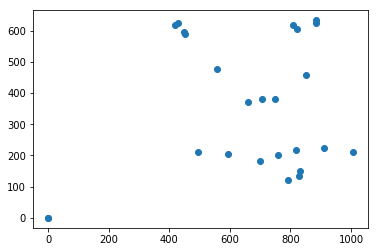

In [146]:
from matplotlib.pyplot import scatter
import matplotlib as plt
scatter(x_torso, y_torso)
# a single point

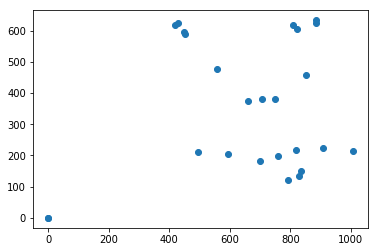

In [147]:
torso_ten = ten_still_frames("warrior2_torso_1.csv")

x_torso, y_torso = x_y_points(np.mean(torso_ten, axis=0)[1:])

scatter(x_torso, y_torso)
# Mean of ten stillest poses

In [132]:
warroir2_label_csv("warrior2_torso_1.csv")
# order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider

([1, 1, 0, 0, 0, 0, 0, 1, 0],
 [1.0455955256706388,
  (0.3159654697316291, 0.2744082949778917),
  0.001755336443721136,
  -0.2941899039084433,
  -0.2941899039084433,
  0.09221144995673379,
  133.42234764615534,
  133.42234764615534,
  0.721161473356488])

In [142]:
warroir2_label_csv_single_pose("warrior2_torso_1.csv")


([1, 1, 0, 0, 1, 0, 0, 1, 0],
 [1.0460943302824754,
  (0.32353910550080756, 0.2898782093482559),
  0.003916655137540885,
  -0.30469300459924414,
  -0.30469300459924414,
  0.08624056813138091,
  133.45604160336651,
  133.45604160336651,
  0.7220629352067954])

## Arms 1

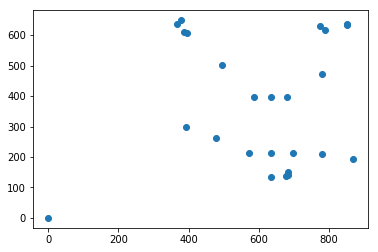

In [134]:
arms_ten = ten_still_frames("warrior2_arms_1.csv")

x_arms, y_arms = x_y_points(arms_ten.iloc[5][1:])

scatter(x_arms, y_arms)
# Single Pose

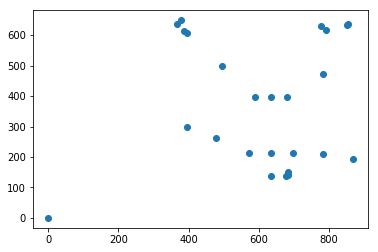

In [148]:
arms_ten = ten_still_frames("warrior2_arms_1.csv")

x_arms, y_arms = x_y_points(np.mean(arms_ten, axis=0)[1:])

scatter(x_arms, y_arms)
# Mean

In [138]:
warroir2_label_csv("warrior2_arms_1.csv")
# order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider

([0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0.011150439786658058,
  (0.0028510846725878286, 0.00025855188461832107),
  -0.22537813629886458,
  -5.2193542353850605e-05,
  -5.2193542353850605e-05,
  -0.0007302381333598232,
  132.96567565961945,
  132.96567565961945,
  0.8149330590066094])

In [139]:
warroir2_label_csv_single_pose("warrior2_arms_1.csv")
# order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider

([0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0.010965250566053686,
  (-0.0006062346447147651, -0.029594866392107764),
  -0.23227045732753324,
  0.00013038305454839778,
  0.00013038305454839778,
  -0.0005864656754676021,
  132.86009958671877,
  132.86009958671877,
  0.8165095185670916])

## Correct Pose

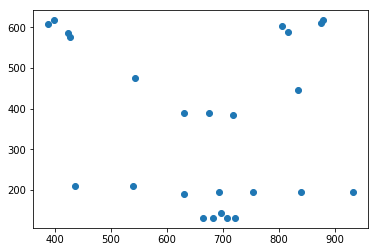

In [150]:
correct_ten = ten_still_frames("warrior2_correct_2.csv")

x_correct, y_correct = x_y_points(correct_ten.iloc[5][1:])

scatter(x_correct, y_correct)
# Single Pose

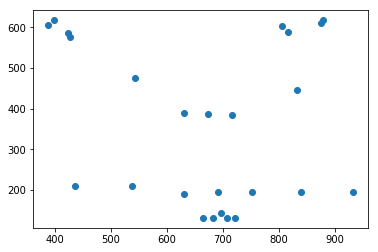

In [149]:
correct_ten = ten_still_frames("warrior2_correct_2.csv")

x_correct, y_correct = x_y_points(np.mean(correct_ten, axis=0)[1:])

scatter(x_correct, y_correct)
# Mean

In [140]:
warroir2_label_csv("warrior2_correct_2.csv")
# order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider

([1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0.4292730690473572,
  (0.03165919862342643, 0.06386141285240796),
  -0.02853063102700834,
  -0.09206598877893538,
  -0.09206598877893538,
  -0.05888285971514198,
  138.81217315092823,
  138.81217315092823,
  0.7848949362300669])

In [141]:
warroir2_label_csv_single_pose("warrior2_correct_2.csv")
# order: head_front, sholders, arms, torso forward, torso backward hips, knee acute, knee obtuse, step wider

([1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0.3938404218720677,
  (0.03131740569377461, 0.0621539247131661),
  -0.031734380369295705,
  -0.09988207727766989,
  -0.09988207727766989,
  -0.08951175406871595,
  139.12820221703436,
  139.12820221703436,
  0.788729490014292])

Metrics will need to be adjusted for rules based poses.  We will also need to descide the window of poses we are looking at and if we want to look at an average or a singel pose.